# Project: Boston Airbnb Data Analysis

## Business Understanding

This is a project for the Udacity Data Scienties Nanodegree. The data is from Kaggle Boston Airbnb Open Data (link: https://www.kaggle.com/datasets/airbnb/boston). I intend to figure out three questions with the data available:

### Question 1: Possible determinants of housing price;

### Question 2 : Housing availability and price trend over months;

### Question 3 : Relationship between customer ratings and housing price.


## Data cleaning

In [294]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [295]:
#read in the dataset
list_df = pd.read_csv('listings.csv')
cal_df = pd.read_csv('calendar.csv')

In [296]:
#check missing values, remove columns that have over 70% data missing 
missing_col = list_df.columns[list_df.isnull().mean()>0.7]
list_df.drop(missing_col, axis=1, inplace = True)

In [297]:
#remove columns that are meaningless to the analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
meaningless_col = ['scrape_id','last_scraped','thumbnail_url','medium_url','picture_url','xl_picture_url'
        ,'host_url','host_thumbnail_url','host_picture_url','listing_url']
list_df.drop(meaningless_col, axis=1, inplace=True)

In [298]:
#clean price variable
list_df.price = list_df['price'].apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).astype(int)

(0.0, 1000.0)

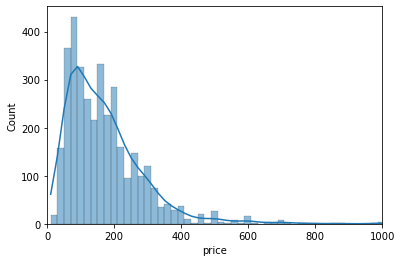

In [299]:
#plot the distribution of price
sns.histplot(list_df.price, bins=200, kde=True)
plt.xlim(0,1000)

## Question 1
From the plots, we can see that housing prices vary with room type, property type, number of bedrooms and bathrooms, neighbourhood, etc.

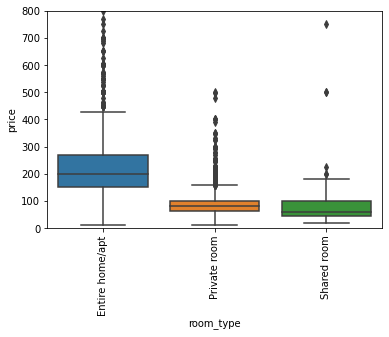

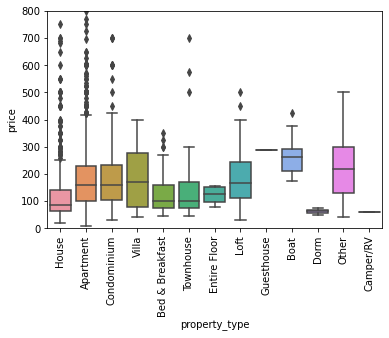

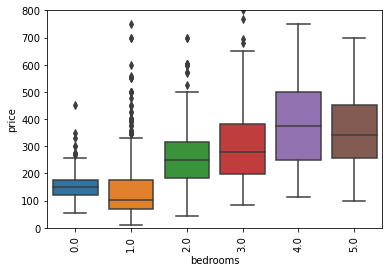

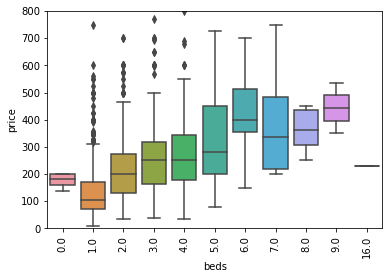

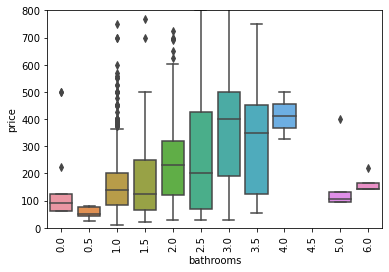

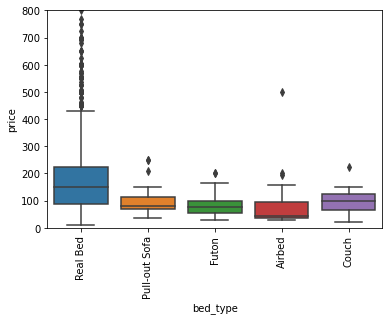

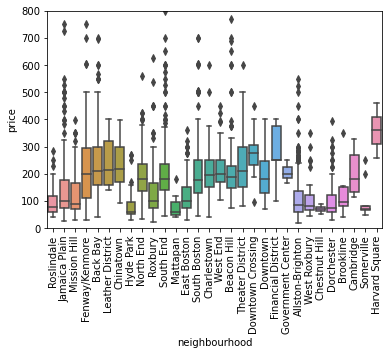

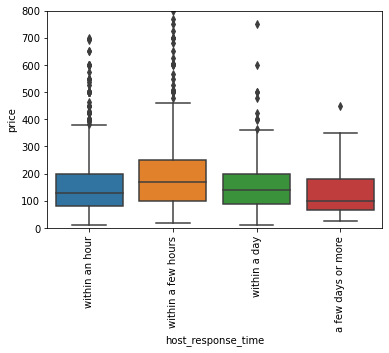

In [300]:
#Question 1: possible determinants of price
#hand pick some possible variables
related_var = ['room_type','property_type','bedrooms','beds','bathrooms','bed_type','neighbourhood','host_response_time']
for col in related_var:
    sns.boxplot(x=col, y='price', data=list_df)
    plt.xticks(rotation=90)
    plt.ylim(0,800)
    plt.show()

## Question 2
The availability of housing has a slight decrease from January to August. During September, the availability has a sharp decrease. Then it increases back to high level afterwards. The price trend is inversely proportional to the availability trend: price tend to go higher with low availability, and vise versa.

In [301]:
#Question2: price and availability trend over time
cal_df.dropna(axis=0, inplace=True)

In [302]:
#extract month from the dataset 
cal_df.date = pd.to_datetime(cal_df.date)
cal_df['month'] = cal_df['date'].dt.month

In [303]:
#clean price variable
cal_df.price = cal_df['price'].apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).astype(int)

In [304]:
#number of available home each month
available_df = cal_df.groupby('month').apply(lambda a: len(a))
available_df = available_df.to_frame(name='availability')
# average price each month
price_df = cal_df.groupby('month').mean()[['price']]

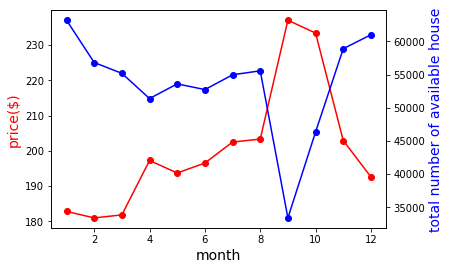

In [305]:
# plot price and availability over month on the same plot
fig,ax = plt.subplots()
ax.plot(price_df,color="red", marker="o")
ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("price($)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(available_df, color="blue", marker="o")
ax2.set_ylabel("total number of available house",color="blue",fontsize=14)
plt.show()

## Question 3
The ratings are on a scale of 0-100. From the plot, we can see that with lower price housing, there tend to be more negative reviews. As price increases, negative reviews decrease.

In [310]:
#Question3: relationship between ratings and price
price_rate = list_df[["price","review_scores_rating","number_of_reviews"]]
price_rate.dropna(inplace=True, axis=0)

/Users/tyler/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(2772, 3)

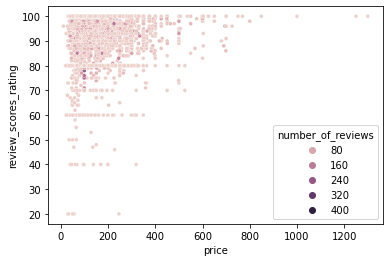

In [347]:
sns.scatterplot(data=price_rate, s=15,
                x='price', y='review_scores_rating',hue='number_of_reviews')
plt.show()

## Evaluation
From the study above, we first identified several determinants of housing price. Then, we found out the price trend, along with availability of housing across the year. Finally, the relationship between ratings and price is exhibited. Valuable insights could be gained through these information. 